In [72]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import sys
sys.path.append("..") 
from src import load_realized_vol, build_har_features,load_earnings,load_implied_vol  # etc.
from src.features import fit_har_regression

In [109]:
realized = load_realized_vol()
earnings = load_earnings()
implied = load_implied_vol("../output/features_data.csv", earnings)
har_1d, har_1w, har_1m = build_har_features(realized)
# Fit regression (earnings dates included)

print(realized.shape, implied.shape)

(501, 503) (501, 412)


In [125]:

earnings

act_symbol       date                when
0              A 2020-02-18  After market close
1              A 2020-05-21  After market close
2              A 2020-08-18  After market close
3              A 2020-11-23  After market close
4              A 2021-02-16  After market close
...          ...        ...                 ...
97181       ZYNE 2022-05-11                 NaN
97182       ZYNE 2022-08-08                 NaN
97183       ZYNE 2023-03-28                 NaN
97184       ZYNE 2023-05-15                 NaN
97185       ZYNE 2023-08-09                 NaN

[97177 rows x 3 columns]

In [ ]:
har)1n===

NameError: name 'cs_har_resultshar_1m' is not defined

In [117]:

cs_har_results = fit_har_regression(realized, har_1d.shift(1), har_1w.shift(1), har_1m.shift(1), earnings_mask=None)
cs_har_averaged_results=cs_har_results[["beta_0","beta_1d","beta_1w","beta_1m"]].rolling(window=5, min_periods=5).mean()
cs_har_averaged_results

beta_0   beta_1d   beta_1w   beta_1m
date                                              
2022-02-02       NaN       NaN       NaN       NaN
2022-02-03       NaN       NaN       NaN       NaN
2022-02-04       NaN       NaN       NaN       NaN
2022-02-07       NaN       NaN       NaN       NaN
2022-02-08  0.063472  0.098693  0.131504  0.508290
...              ...       ...       ...       ...
2023-12-22  0.053570  0.064914  0.181912  0.553718
2023-12-26  0.041769  0.052227  0.142633  0.581730
2023-12-27  0.042260  0.100923  0.080980  0.586151
2023-12-28  0.024920  0.151518  0.020565  0.522552
2023-12-29  0.015479  0.181047  0.001147  0.545331

[480 rows x 4 columns]

In [118]:
def create_forecast(har_1d, har_1w, har_1m, har_betas,av_period=5):
    averaged_betas = har_betas[["beta_0", "beta_1d", "beta_1w", "beta_1m"]].rolling(window=av_period, min_periods=av_period).mean()
    forecast = (
        averaged_betas["beta_0"].shift(0).values[:, None] 
        + averaged_betas["beta_1d"].shift(0).values[:, None] * har_1d.loc[cs_har_averaged_results.index]
        + averaged_betas["beta_1w"].shift(0).values[:, None] * har_1w.loc[cs_har_averaged_results.index]
        + averaged_betas["beta_1m"].shift(0).values[:, None] * har_1m.loc[cs_har_averaged_results.index]
    )
    return forecast

forecast = create_forecast(har_1d, har_1w, har_1m, cs_har_results)
forecast

ticker             A       AAL       AAP      AAPL      ABBV       ABC  \
date                                                                     
2022-02-02       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-08  0.365366  0.555469  0.355848  0.366718  0.304246  0.370351   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.290741  0.345713  0.497144  0.219310  0.236167       NaN   
2023-12-26  0.266644  0.318946  0.470689  0.195212  0.217121       NaN   
2023-12-27  0.267535  0.318536  0.464870  0.201368  0.213677       NaN   
2023-12-28  0.206866  0.263266  0.379660  0.149348  0.165613       NaN   
2023-12-29  0.216607  0.268474  0.368748  0.171066  0.162653       NaN   

ticker           ABT      ACGL       ACN      ADBE  ...      WYNN       XEL  \
date                                                ...                       
2022-02-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-08  0.274757  0.315990  0.373703  0.503209  ...  0.540684  0.330057   
...              ...       ...       ...       ...  ...       ...       ...   
2023-12-22  0.216680  0.322005  0.243264  0.329333  ...  0.331700  0.253395   
2023-12-26  0.195919  0.287334  0.218560  0.292507  ...  0.303593  0.229365   
2023-12-27  0.181162  0.272948  0.207703  0.265987  ...  0.297274  0.216168   
2023-12-28  0.138542  0.233136  0.163871  0.226549  ...  0.256319  0.175095   
2023-12-29  0.140210  0.223956  0.167784  0.251640  ...  0.251764  0.182558   

ticker           XOM      XRAY       XYL       YUM       ZBH      ZBRA  \
date                                                                     
2022-02-02       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-08  0.367468  0.353522  0.479279  0.288415  0.487923  0.489910   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.276445  0.327421  0.256208  0.226008  0.230013  0.436585   
2023-12-26  0.249519  0.290771  0.223606  0.205135  0.207464  0.383489   
2023-12-27  0.237272  0.278180  0.219730  0.198332  0.202612  0.370461   
2023-12-28  0.201378  0.213377  0.170916  0.158350  0.155166  0.296037   
2023-12-29  0.192355  0.216784  0.173671  0.161685  0.158001  0.312378   

ticker          ZION       ZTS  
date                            
2022-02-02       NaN       NaN  
2022-02-03       NaN       NaN  
2022-02-04       NaN       NaN  
2022-02-07       NaN       NaN  
2022-02-08  0.398616  0.335009  
...              ...       ...  
2023-12-22  0.449017  0.266815  
2023-12-26  0.410832  0.237670  
2023-12-27  0.406511  0.226890  
2023-12-28  0.312881  0.200019  
2023-12-29  0.350018  0.187868  

[480 rows x 503 columns]

In [120]:
from src.forecast import create_forecast

forecast = create_forecast(har_1d, har_1w, har_1m, cs_har_results)
forecast

ticker             A       AAL       AAP      AAPL      ABBV       ABC  \
date                                                                     
2022-02-02       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-08  0.365366  0.555469  0.355848  0.366718  0.304246  0.370351   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.290741  0.345713  0.497144  0.219310  0.236167       NaN   
2023-12-26  0.266644  0.318946  0.470689  0.195212  0.217121       NaN   
2023-12-27  0.267535  0.318536  0.464870  0.201368  0.213677       NaN   
2023-12-28  0.206866  0.263266  0.379660  0.149348  0.165613       NaN   
2023-12-29  0.216607  0.268474  0.368748  0.171066  0.162653       NaN   

ticker           ABT      ACGL       ACN      ADBE  ...      WYNN       XEL  \
date                                                ...                       
2022-02-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-08  0.274757  0.315990  0.373703  0.503209  ...  0.540684  0.330057   
...              ...       ...       ...       ...  ...       ...       ...   
2023-12-22  0.216680  0.322005  0.243264  0.329333  ...  0.331700  0.253395   
2023-12-26  0.195919  0.287334  0.218560  0.292507  ...  0.303593  0.229365   
2023-12-27  0.181162  0.272948  0.207703  0.265987  ...  0.297274  0.216168   
2023-12-28  0.138542  0.233136  0.163871  0.226549  ...  0.256319  0.175095   
2023-12-29  0.140210  0.223956  0.167784  0.251640  ...  0.251764  0.182558   

ticker           XOM      XRAY       XYL       YUM       ZBH      ZBRA  \
date                                                                     
2022-02-02       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-08  0.367468  0.353522  0.479279  0.288415  0.487923  0.489910   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.276445  0.327421  0.256208  0.226008  0.230013  0.436585   
2023-12-26  0.249519  0.290771  0.223606  0.205135  0.207464  0.383489   
2023-12-27  0.237272  0.278180  0.219730  0.198332  0.202612  0.370461   
2023-12-28  0.201378  0.213377  0.170916  0.158350  0.155166  0.296037   
2023-12-29  0.192355  0.216784  0.173671  0.161685  0.158001  0.312378   

ticker          ZION       ZTS  
date                            
2022-02-02       NaN       NaN  
2022-02-03       NaN       NaN  
2022-02-04       NaN       NaN  
2022-02-07       NaN       NaN  
2022-02-08  0.398616  0.335009  
...              ...       ...  
2023-12-22  0.449017  0.266815  
2023-12-26  0.410832  0.237670  
2023-12-27  0.406511  0.226890  
2023-12-28  0.312881  0.200019  
2023-12-29  0.350018  0.187868  

[480 rows x 503 columns]

In [121]:
from src.signals import compute_signal_matrix
signal_matrix=compute_signal_matrix(forecast, implied.shift(0))
signal_matrix

ticker             A       AAL       AAP      AAPL      ABBV       ABC  \
date                                                                     
2022-02-02       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-08  0.024493  0.033908       NaN  0.126973  0.116237  0.107733   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.048211  0.015577  0.046033  0.061305  0.080579       NaN   
2023-12-26  0.017275 -0.056188 -0.031428  0.017644  0.042054       NaN   
2023-12-27  0.020030 -0.055804 -0.016526  0.026271  0.049875       NaN   
2023-12-28 -0.029753 -0.103413 -0.093500 -0.012065  0.004287       NaN   
2023-12-29 -0.015517 -0.079096 -0.080323  0.014949  0.004496       NaN   

ticker           ABT      ACGL       ACN      ADBE  ...  WYNN  XEL  XOM  XRAY  \
date                                                ...                         
2022-02-02       NaN       NaN       NaN       NaN  ...   NaN  NaN  NaN   NaN   
2022-02-03       NaN       NaN       NaN       NaN  ...   NaN  NaN  NaN   NaN   
2022-02-04       NaN       NaN       NaN       NaN  ...   NaN  NaN  NaN   NaN   
2022-02-07       NaN       NaN       NaN       NaN  ...   NaN  NaN  NaN   NaN   
2022-02-08  0.052076       NaN  0.059925  0.132511  ...   NaN  NaN  NaN   NaN   
...              ...       ...       ...       ...  ...   ...  ...  ...   ...   
2023-12-22  0.059357  0.081088  0.087521  0.095050  ...   NaN  NaN  NaN   NaN   
2023-12-26  0.025917  0.036501  0.046305  0.042856  ...   NaN  NaN  NaN   NaN   
2023-12-27  0.016231  0.039472  0.048003  0.029544  ...   NaN  NaN  NaN   NaN   
2023-12-28 -0.014186       NaN  0.005988  0.003597  ...   NaN  NaN  NaN   NaN   
2023-12-29 -0.009544       NaN  0.024603  0.032111  ...   NaN  NaN  NaN   NaN   

ticker      XYL  YUM  ZBH  ZBRA  ZION  ZTS  
date                                        
2022-02-02  NaN  NaN  NaN   NaN   NaN  NaN  
2022-02-03  NaN  NaN  NaN   NaN   NaN  NaN  
2022-02-04  NaN  NaN  NaN   NaN   NaN  NaN  
2022-02-07  NaN  NaN  NaN   NaN   NaN  NaN  
2022-02-08  NaN  NaN  NaN   NaN   NaN  NaN  
...         ...  ...  ...   ...   ...  ...  
2023-12-22  NaN  NaN  NaN   NaN   NaN  NaN  
2023-12-26  NaN  NaN  NaN   NaN   NaN  NaN  
2023-12-27  NaN  NaN  NaN   NaN   NaN  NaN  
2023-12-28  NaN  NaN  NaN   NaN   NaN  NaN  
2023-12-29  NaN  NaN  NaN   NaN   NaN  NaN  

[480 rows x 503 columns]

In [122]:
from src.signals import size_positions
positions = size_positions(signal_matrix, implied.loc[forecast.index], method='unit', threshold=0.0)
positions

ticker        A  AAL  AAP  AAPL  ABBV  ABC  ABT  ACGL  ACN  ADBE  ...  WYNN  \
date                                                              ...         
2022-02-02  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0   
2022-02-03  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0   
2022-02-04  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0   
2022-02-07  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0   
2022-02-08  1.0  1.0  0.0   1.0   1.0  1.0  1.0   0.0  1.0   1.0  ...   0.0   
...         ...  ...  ...   ...   ...  ...  ...   ...  ...   ...  ...   ...   
2023-12-22  1.0  1.0  1.0   1.0   1.0  0.0  1.0   1.0  1.0   1.0  ...   0.0   
2023-12-26  1.0  0.0  0.0   1.0   1.0  0.0  1.0   1.0  1.0   1.0  ...   0.0   
2023-12-27  1.0  0.0  0.0   1.0   1.0  0.0  1.0   1.0  1.0   1.0  ...   0.0   
2023-12-28  0.0  0.0  0.0   0.0   1.0  0.0  0.0   0.0  1.0   1.0  ...   0.0   
2023-12-29  0.0  0.0  0.0   1.0   1.0  0.0  0.0   0.0  1.0   1.0  ...   0.0   

ticker      XEL  XOM  XRAY  XYL  YUM  ZBH  ZBRA  ZION  ZTS  
date                                                        
2022-02-02  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2022-02-03  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2022-02-04  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2022-02-07  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2022-02-08  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
...         ...  ...   ...  ...  ...  ...   ...   ...  ...  
2023-12-22  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2023-12-26  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2023-12-27  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2023-12-28  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2023-12-29  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  

[480 rows x 503 columns]

In [82]:
aligned_realized, aligned_implied = realized.shift(-1).align(implied.shift(0), join='inner', axis=None)
aligned_realized.columns

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE',
       ...
       'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBNY', 'SBUX',
       'SCHW'],
      dtype='object', name='ticker', length=405)

In [124]:
forecast

ticker             A       AAL       AAP      AAPL      ABBV       ABC  \
date                                                                     
2022-02-02       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-08  0.365366  0.555469  0.355848  0.366718  0.304246  0.370351   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.290741  0.345713  0.497144  0.219310  0.236167       NaN   
2023-12-26  0.266644  0.318946  0.470689  0.195212  0.217121       NaN   
2023-12-27  0.267535  0.318536  0.464870  0.201368  0.213677       NaN   
2023-12-28  0.206866  0.263266  0.379660  0.149348  0.165613       NaN   
2023-12-29  0.216607  0.268474  0.368748  0.171066  0.162653       NaN   

ticker           ABT      ACGL       ACN      ADBE  ...      WYNN       XEL  \
date                                                ...                       
2022-02-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-02-08  0.274757  0.315990  0.373703  0.503209  ...  0.540684  0.330057   
...              ...       ...       ...       ...  ...       ...       ...   
2023-12-22  0.216680  0.322005  0.243264  0.329333  ...  0.331700  0.253395   
2023-12-26  0.195919  0.287334  0.218560  0.292507  ...  0.303593  0.229365   
2023-12-27  0.181162  0.272948  0.207703  0.265987  ...  0.297274  0.216168   
2023-12-28  0.138542  0.233136  0.163871  0.226549  ...  0.256319  0.175095   
2023-12-29  0.140210  0.223956  0.167784  0.251640  ...  0.251764  0.182558   

ticker           XOM      XRAY       XYL       YUM       ZBH      ZBRA  \
date                                                                     
2022-02-02       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-03       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-07       NaN       NaN       NaN       NaN       NaN       NaN   
2022-02-08  0.367468  0.353522  0.479279  0.288415  0.487923  0.489910   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.276445  0.327421  0.256208  0.226008  0.230013  0.436585   
2023-12-26  0.249519  0.290771  0.223606  0.205135  0.207464  0.383489   
2023-12-27  0.237272  0.278180  0.219730  0.198332  0.202612  0.370461   
2023-12-28  0.201378  0.213377  0.170916  0.158350  0.155166  0.296037   
2023-12-29  0.192355  0.216784  0.173671  0.161685  0.158001  0.312378   

ticker          ZION       ZTS  
date                            
2022-02-02       NaN       NaN  
2022-02-03       NaN       NaN  
2022-02-04       NaN       NaN  
2022-02-07       NaN       NaN  
2022-02-08  0.398616  0.335009  
...              ...       ...  
2023-12-22  0.449017  0.266815  
2023-12-26  0.410832  0.237670  
2023-12-27  0.406511  0.226890  
2023-12-28  0.312881  0.200019  
2023-12-29  0.350018  0.187868  

[480 rows x 503 columns]

In [83]:
aligned_implied

ticker             A       AAL       AAP      AAPL      ABBV       ABC  \
c_date                                                                   
2022-01-03  0.205461  0.437984  0.240868  0.254810  0.205457  0.223165   
2022-01-04  0.239662  0.439000  0.230041  0.265682  0.214934  0.240311   
2022-01-05  0.270721  0.517916  0.244753  0.345710  0.247652  0.351434   
2022-01-06  0.250318  0.533815  0.257104  0.321710  0.229292  0.298166   
2022-01-07  0.267843  0.473963  0.251791  0.268135  0.208106  0.259304   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.242531  0.330136  0.451111  0.158005  0.155588  0.162017   
2023-12-26  0.249369  0.375134  0.502118  0.177568  0.175067  0.173052   
2023-12-27  0.247505  0.374340  0.481396  0.175097  0.163802       NaN   
2023-12-28  0.236619  0.366678  0.473160  0.161413  0.161325       NaN   
2023-12-29  0.232124  0.347570  0.449071  0.156117  0.158157  0.148226   

ticker           ABT      ACGL       ACN      ADBE  ...       ROK       ROL  \
c_date                                              ...                       
2022-01-03  0.209424       NaN  0.204240  0.278416  ...  0.239103       NaN   
2022-01-04  0.232268       NaN  0.228429  0.318270  ...  0.229682       NaN   
2022-01-05  0.257830       NaN  0.288523  0.401573  ...  0.235030       NaN   
2022-01-06  0.251152       NaN  0.353080  0.366166  ...  0.237541       NaN   
2022-01-07  0.229057       NaN  0.257965  0.313436  ...  0.243369       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2023-12-22  0.157323  0.240917  0.155743  0.234283  ...  0.207555       NaN   
2023-12-26  0.170001  0.250832  0.172256  0.249651  ...  0.211116  0.181609   
2023-12-27  0.164930  0.233476  0.159701  0.236443  ...  0.205381  0.211672   
2023-12-28  0.152728       NaN  0.157883  0.222952  ...  0.198549  0.171365   
2023-12-29  0.149753       NaN  0.143182  0.219529  ...  0.192404  0.162634   

ticker           ROP      ROST       RSG       RTX      SBAC      SBNY  \
c_date                                                                   
2022-01-03  0.210527  0.250583  0.188795  0.196345  0.237812  0.408778   
2022-01-04  0.206631  0.247018  0.224607  0.204368  0.249587  0.417399   
2022-01-05  0.207070  0.303518  0.210267  0.238334  0.310237  0.416161   
2022-01-06  0.230762  0.300660  0.200954  0.230351  0.316888  0.418999   
2022-01-07  0.211683  0.272505  0.196798  0.206221  0.271097  0.427485   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.135134  0.152636  0.139060  0.177308  0.268661       NaN   
2023-12-26  0.145812  0.179455  0.145538  0.201936  0.275574       NaN   
2023-12-27  0.135302  0.165755  0.142440  0.191168  0.268502       NaN   
2023-12-28  0.130497  0.166295       NaN  0.185500  0.245065       NaN   
2023-12-29  0.127482  0.157030       NaN  0.172897  0.249719       NaN   

ticker          SBUX      SCHW  
c_date                          
2022-01-03  0.205008  0.257695  
2022-01-04  0.223356  0.276717  
2022-01-05  0.251636  0.317144  
2022-01-06  0.252202  0.298513  
2022-01-07  0.241194  0.280028  
...              ...       ...  
2023-12-22  0.172385       NaN  
2023-12-26  0.191443       NaN  
2023-12-27  0.183218       NaN  
2023-12-28  0.171486       NaN  
2023-12-29  0.160255       NaN  

[501 rows x 405 columns]

In [84]:
signal_matrix.stack().rename("signal").reset_index()
#y = (realized.shift(-1).loc[forecast.index] > implied.loc[forecast.index]).stack().astype(int).reset_index(drop=True)
y=(aligned_realized.loc[forecast.index]>aligned_implied.loc[forecast.index]).stack().astype(int).reset_index(drop=True)

In [140]:
X = signal_matrix.stack().rename("signal")
#y = (aligned_realized.loc[forecast.index]>aligned_implied.loc[forecast.index]).stack().astype(int).reset_index(drop=True)
y = (aligned_realized > aligned_implied).stack().astype(int)

# Intersection of multi-indices
common_idx = X.index.intersection(y.index)

X_aligned = X.loc[common_idx]
y_aligned = y.loc[common_idx]

# Ready for modeling
X_df = X_aligned.reset_index(drop=True).to_frame()
y_series = y_aligned.reset_index(drop=True)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3).fit(X_df, y_series)




In [136]:
print("Accuracy:", clf.score(X_df, y_series))
print("Feature Importance:", clf.feature_importances_)

Accuracy: 0.705363327616934
Feature Importance: [1.]


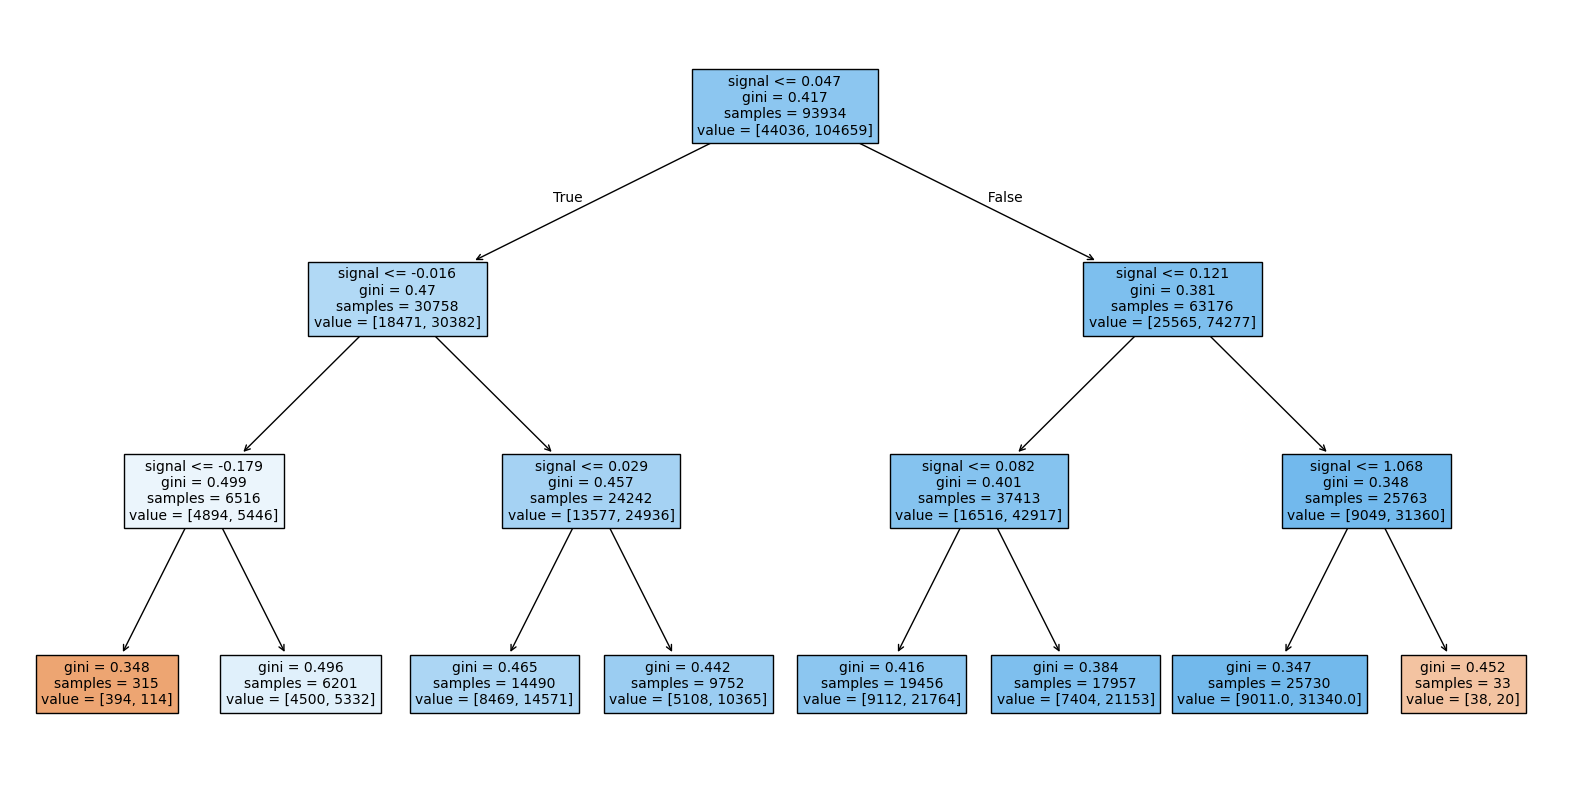

In [141]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))  # <-- make figure larger explicitly
plot_tree(clf.estimators_[0],
          feature_names=X_train.columns,
          filled=True,
          fontsize=10,         # <-- clearly increase font size
          max_depth=3)
plt.show()

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.3)

clf2 = RandomForestClassifier(max_depth=3).fit(X_train, y_train)

print("Train Accuracy:", clf2.score(X_train, y_train))
print("Test Accuracy:", clf2.score(X_test, y_test))

Train Accuracy: 0.7045904348327344
Test Accuracy: 0.707032213230514


In [14]:
def align_dates(*dfs):
    idx = dfs[0].index
    for df in dfs[1:]:
        idx = idx.intersection(df.index)
    return idx

aligned_idx = align_dates(realized, har_1d, har_1w, har_1m, implied)
aligned_idx


DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=501, freq=None)

In [108]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_example = pd.DataFrame({
    'binary_feature': np.random.randint(0, 2, 1000),
    'continuous_feature': np.random.randn(1000)
})
y_example = np.random.randint(0, 2, 1000)

X_train, X_test, y_train, y_test = train_test_split(X_example, y_example, test_size=0.3)

clf = RandomForestClassifier().fit(X_train, y_train)

print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

Train Accuracy: 0.9985714285714286
Test Accuracy: 0.49


In [103]:
y_example

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [104]:
X_example

binary_feature  continuous_feature
0               1           -0.348287
1               0            0.781369
2               1            0.300288
3               1            1.311030
4               1            0.863786
5               0           -0.790424
6               1            1.028573
7               1            0.656604
8               1            1.777869
9               1           -1.917269